In [19]:
import nbformat
import os
from nbconvert.preprocessors import ExecutePreprocessor
from sklearn.metrics import accuracy_score, confusion_matrix

import json

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd

In [11]:
def load_notebook(path):
    with open(path, "r", encoding="utf-8") as f:
        return nbformat.read(f, as_version=4)

nb_paths = {
    "DT": "DT.ipynb",
    "NB": "NB.ipynb",
    "Regression": "Regression.ipynb"
}

notebooks = {key: load_notebook(path) for key, path in nb_paths.items()}

In [12]:
def execute_notebook(nb, path):
    ep = ExecutePreprocessor(timeout=600, kernel_name="python3")
    ep.preprocess(nb, {'metadata': {'path': os.path.dirname(path) or '.'}})
    return nb

executed_nbs = {key: execute_notebook(nb, path) for key, nb, path in zip(nb_paths.keys(), notebooks.values(), nb_paths.values())}

In [15]:
def load_metrics(file):
    with open(file, 'r') as f:
        return json.load(f)

dt_metrics = load_metrics("model_metrics_DT.json")
nb_metrics = load_metrics("model_metrics_NB.json")
reg_metrics = load_metrics("model_metrics_Regression.json")


In [16]:
print("\n🔍 Accuracy Comparison:")
print(f"Logistic Regression: {reg_metrics['accuracy']:.2f}")
print(f"Multinomial Naive Bayes: {nb_metrics['accuracy']:.2f}")
print(f"Decision Tree: {dt_metrics['accuracy']:.2f}")

print("\n📊 Confusion Matrices:")
print("Logistic Regression:\n", reg_metrics['confusion_matrix'])
print("Naive Bayes:\n", nb_metrics['confusion_matrix'])
print("Decision Tree:\n", dt_metrics['confusion_matrix'])


🔍 Accuracy Comparison:
Logistic Regression: 0.82
Multinomial Naive Bayes: 0.74
Decision Tree: 1.00

📊 Confusion Matrices:
Logistic Regression:
 [[261, 14], [51, 40]]
Naive Bayes:
 [[234, 41], [55, 36]]
Decision Tree:
 [[275, 0], [0, 91]]


In [22]:
with open("model_metrics_DT.json") as f:
    dt_results = json.load(f)

with open("model_metrics_NB.json") as f:
    nb_results = json.load(f)

with open("model_metrics_Regression.json") as f:
    reg_results = json.load(f)

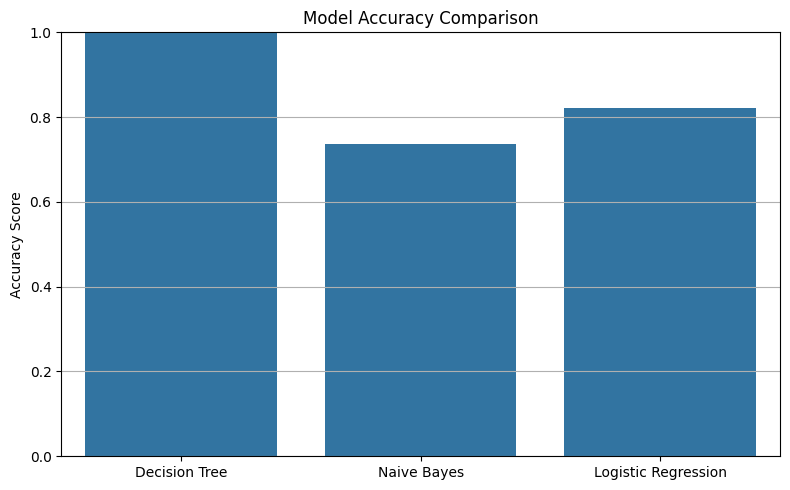

In [24]:
models = ['Decision Tree', 'Naive Bayes', 'Logistic Regression']
accuracies = [dt_results['accuracy'], nb_results['accuracy'], reg_results['accuracy']]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


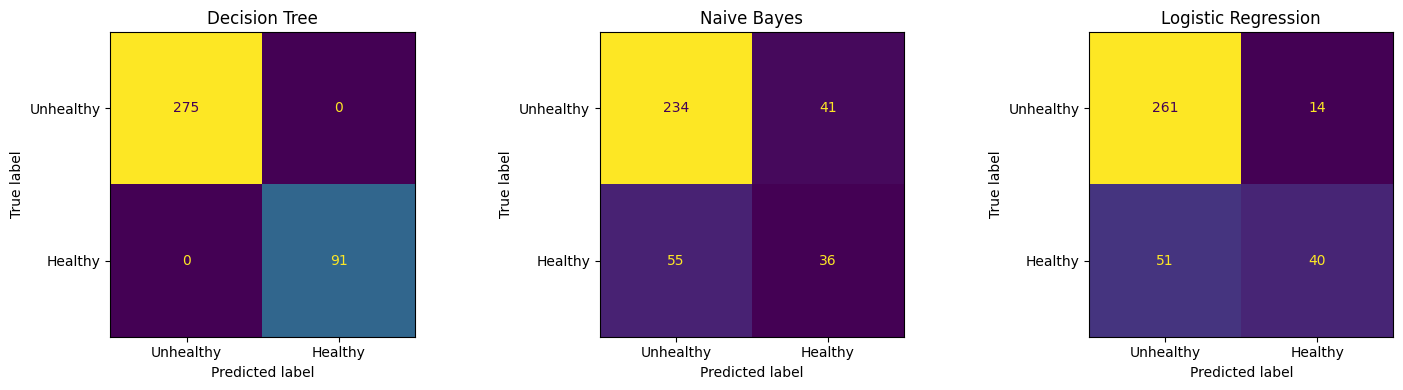

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cms = [
    np.array(dt_results['confusion_matrix']),
    np.array(nb_results['confusion_matrix']),
    np.array(reg_results['confusion_matrix'])
]

for ax, cm, name in zip(axs, cms, models):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Unhealthy", "Healthy"])
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(name)

plt.tight_layout()
plt.show()
